In [501]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
pd.set_option('display.float_format', lambda x: '{:.2f}'.format(x))
np.set_printoptions (suppress=True)

In [502]:
df_customers=pd.read_csv("dataset/customers.csv")
df_loans=pd.read_csv("dataset/loans.csv")
df_bureau=pd.read_csv("dataset/bureau_data.csv")

In [503]:
df_customers.shape, df_loans.shape, df_bureau.shape

((50000, 12), (50000, 15), (50000, 8))

In [504]:
df = pd.merge(df_customers, df_loans, on='cust_id')
df.head(3)

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,...,2467000,49340.00,444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,False
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,...,3883000,77660.00,698940,3106400,30,709309,464100,2019-07-24,2019-08-15,False
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,...,2170000,43400.00,390600,1736000,21,1562399,1476042,2019-07-24,2019-08-21,False


In [505]:
df =pd.merge(df, df_bureau)
df.head(3)

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,default,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,...,2019-07-24,2019-08-10,False,1,1,42,0,0,3,7
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,...,2019-07-24,2019-08-15,False,3,1,96,12,60,5,4
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,...,2019-07-24,2019-08-21,False,2,1,82,24,147,6,58


In [506]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   cust_id                      50000 non-null  object 
 1   age                          50000 non-null  int64  
 2   gender                       50000 non-null  object 
 3   marital_status               50000 non-null  object 
 4   employment_status            50000 non-null  object 
 5   income                       50000 non-null  int64  
 6   number_of_dependants         50000 non-null  int64  
 7   residence_type               49938 non-null  object 
 8   years_at_current_address     50000 non-null  int64  
 9   city                         50000 non-null  object 
 10  state                        50000 non-null  object 
 11  zipcode                      50000 non-null  int64  
 12  loan_id                      50000 non-null  object 
 13  loan_purpose    

In [507]:
df['default'] = df['default'].astype(int)
df.default.value_counts()

default
0    45703
1     4297
Name: count, dtype: int64

In [508]:
X = df.drop("default", axis="columns")
y = df['default']
X_train, X_test,y_train,y_test=train_test_split(X,y, stratify=y, test_size=0.25, random_state=42)

df_train=pd.concat([X_train,y_train],axis='columns')
df_test=pd.concat([X_test,y_test],axis='columns')


In [509]:
df_train.head()

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default
12746,C12747,59,M,Married,Self-Employed,11327000,3,Owned,30,Hyderabad,...,2020-10-31,2020-11-11,4,2,152,20,118,4,36,0
32495,C32496,44,F,Single,Salaried,715000,0,Owned,27,Mumbai,...,2022-10-22,2022-10-27,3,1,160,10,62,5,5,0
43675,C43676,38,M,Single,Salaried,3195000,0,Mortgage,26,Chennai,...,2023-12-04,2023-12-29,1,1,54,12,67,4,0,0
9040,C09041,42,M,Married,Salaried,1500000,2,Mortgage,30,Bangalore,...,2020-06-18,2020-07-07,3,0,76,0,0,8,87,0
13077,C13078,58,M,Married,Self-Employed,1817000,4,Owned,29,Pune,...,2020-11-12,2020-12-07,1,2,60,0,0,1,71,0


In [510]:
df_test.head()

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default
19205,C19206,36,M,Married,Self-Employed,3728000,3,Owned,24,Jaipur,...,2021-06-24,2021-07-23,2,1,42,0,0,5,98,0
15514,C15515,43,F,Single,Self-Employed,2493000,0,Owned,23,Delhi,...,2021-02-09,2021-02-18,4,0,125,0,0,5,32,0
30367,C30368,30,M,Married,Self-Employed,3114000,4,Owned,27,Delhi,...,2022-08-06,2022-08-21,3,0,76,0,0,6,82,0
35347,C35348,37,F,Single,Salaried,570000,2,Owned,5,Pune,...,2023-02-03,2023-02-04,4,2,125,3,21,7,48,0
41814,C41815,48,F,Single,Salaried,662000,0,Mortgage,23,Chennai,...,2023-09-27,2023-10-17,3,1,131,14,89,8,97,1


# Data Cleaning

In [511]:
df_train.isna().sum()

cust_id                         0
age                             0
gender                          0
marital_status                  0
employment_status               0
income                          0
number_of_dependants            0
residence_type                 47
years_at_current_address        0
city                            0
state                           0
zipcode                         0
loan_id                         0
loan_purpose                    0
loan_type                       0
sanction_amount                 0
loan_amount                     0
processing_fee                  0
gst                             0
net_disbursement                0
loan_tenure_months              0
principal_outstanding           0
bank_balance_at_application     0
disbursal_date                  0
installment_start_dt            0
number_of_open_accounts         0
number_of_closed_accounts       0
total_loan_months               0
delinquent_months               0
total_dpd     

In [512]:
df_train.residence_type.unique()

array(['Owned', 'Mortgage', 'Rented', nan], dtype=object)

In [513]:
mode_residence=df_train.residence_type.mode()[0]
mode_residence

'Owned'

In [514]:
df_train.residence_type.fillna(mode_residence,inplace=True)

C:\Users\Trijesh Kondapuram\AppData\Local\Temp\ipykernel_13236\1744904132.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train.residence_type.fillna(mode_residence,inplace=True)


In [515]:
df_train.residence_type.unique()

array(['Owned', 'Mortgage', 'Rented'], dtype=object)

In [516]:
df_test.residence_type.fillna(mode_residence,inplace=True)

C:\Users\Trijesh Kondapuram\AppData\Local\Temp\ipykernel_13236\838491418.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test.residence_type.fillna(mode_residence,inplace=True)


In [517]:
df_train.duplicated().sum()

np.int64(0)

In [518]:
df_train.columns

Index(['cust_id', 'age', 'gender', 'marital_status', 'employment_status',
       'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode', 'loan_id',
       'loan_purpose', 'loan_type', 'sanction_amount', 'loan_amount',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application',
       'disbursal_date', 'installment_start_dt', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio', 'default'],
      dtype='object')

In [519]:
numeric_cols = df_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df_train.select_dtypes(include=['object', 'category']).columns.tolist()


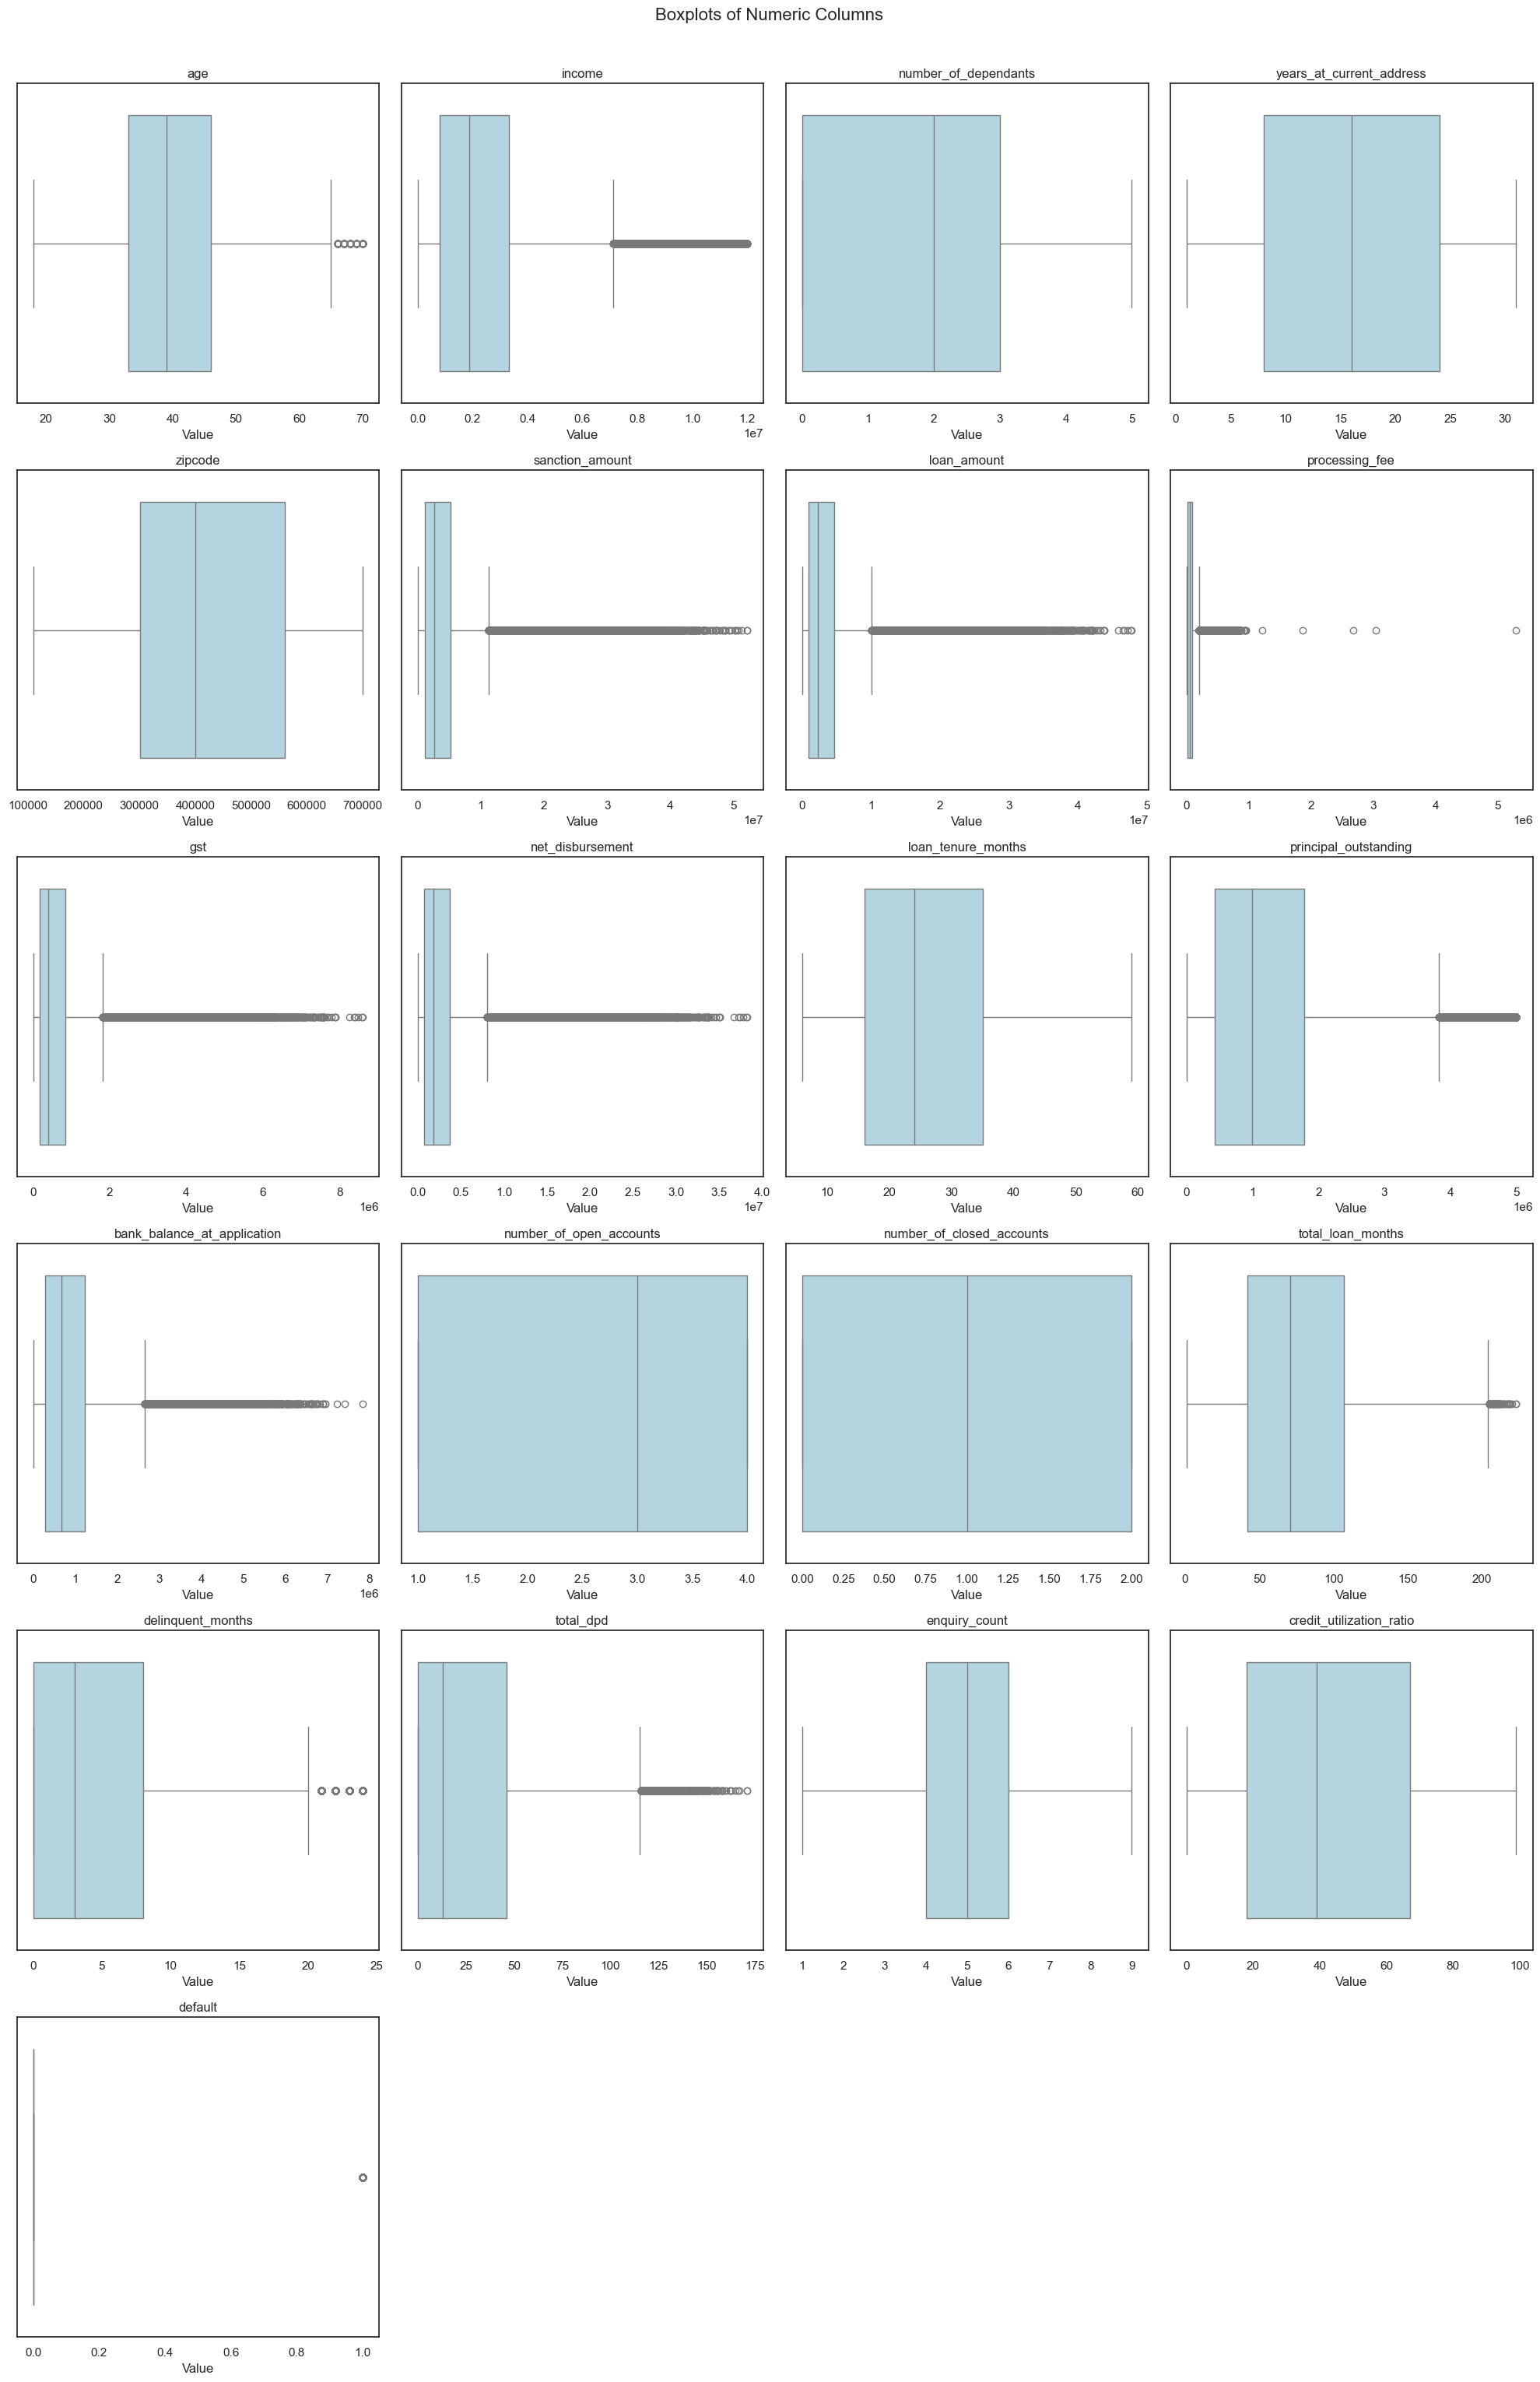

In [520]:
num_plots = len(numeric_cols)
num_cols = 4  # Number of plots per row
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate required number of rows

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 5 * num_rows))
axes = axes.flatten()  # Flatten for easy indexing

# Create boxplots
for i, col in enumerate(numeric_cols):
    sns.boxplot(x=df_train[col], ax=axes[i], color='lightblue')
    axes[i].set_title(col)
    axes[i].set_xlabel('Value')

# Turn off any unused subplots
for j in range(i + 1, num_rows * num_cols):
    axes[j].axis('off')

plt.tight_layout()
plt.suptitle("Boxplots of Numeric Columns", fontsize=16, y=1.02)
plt.show()

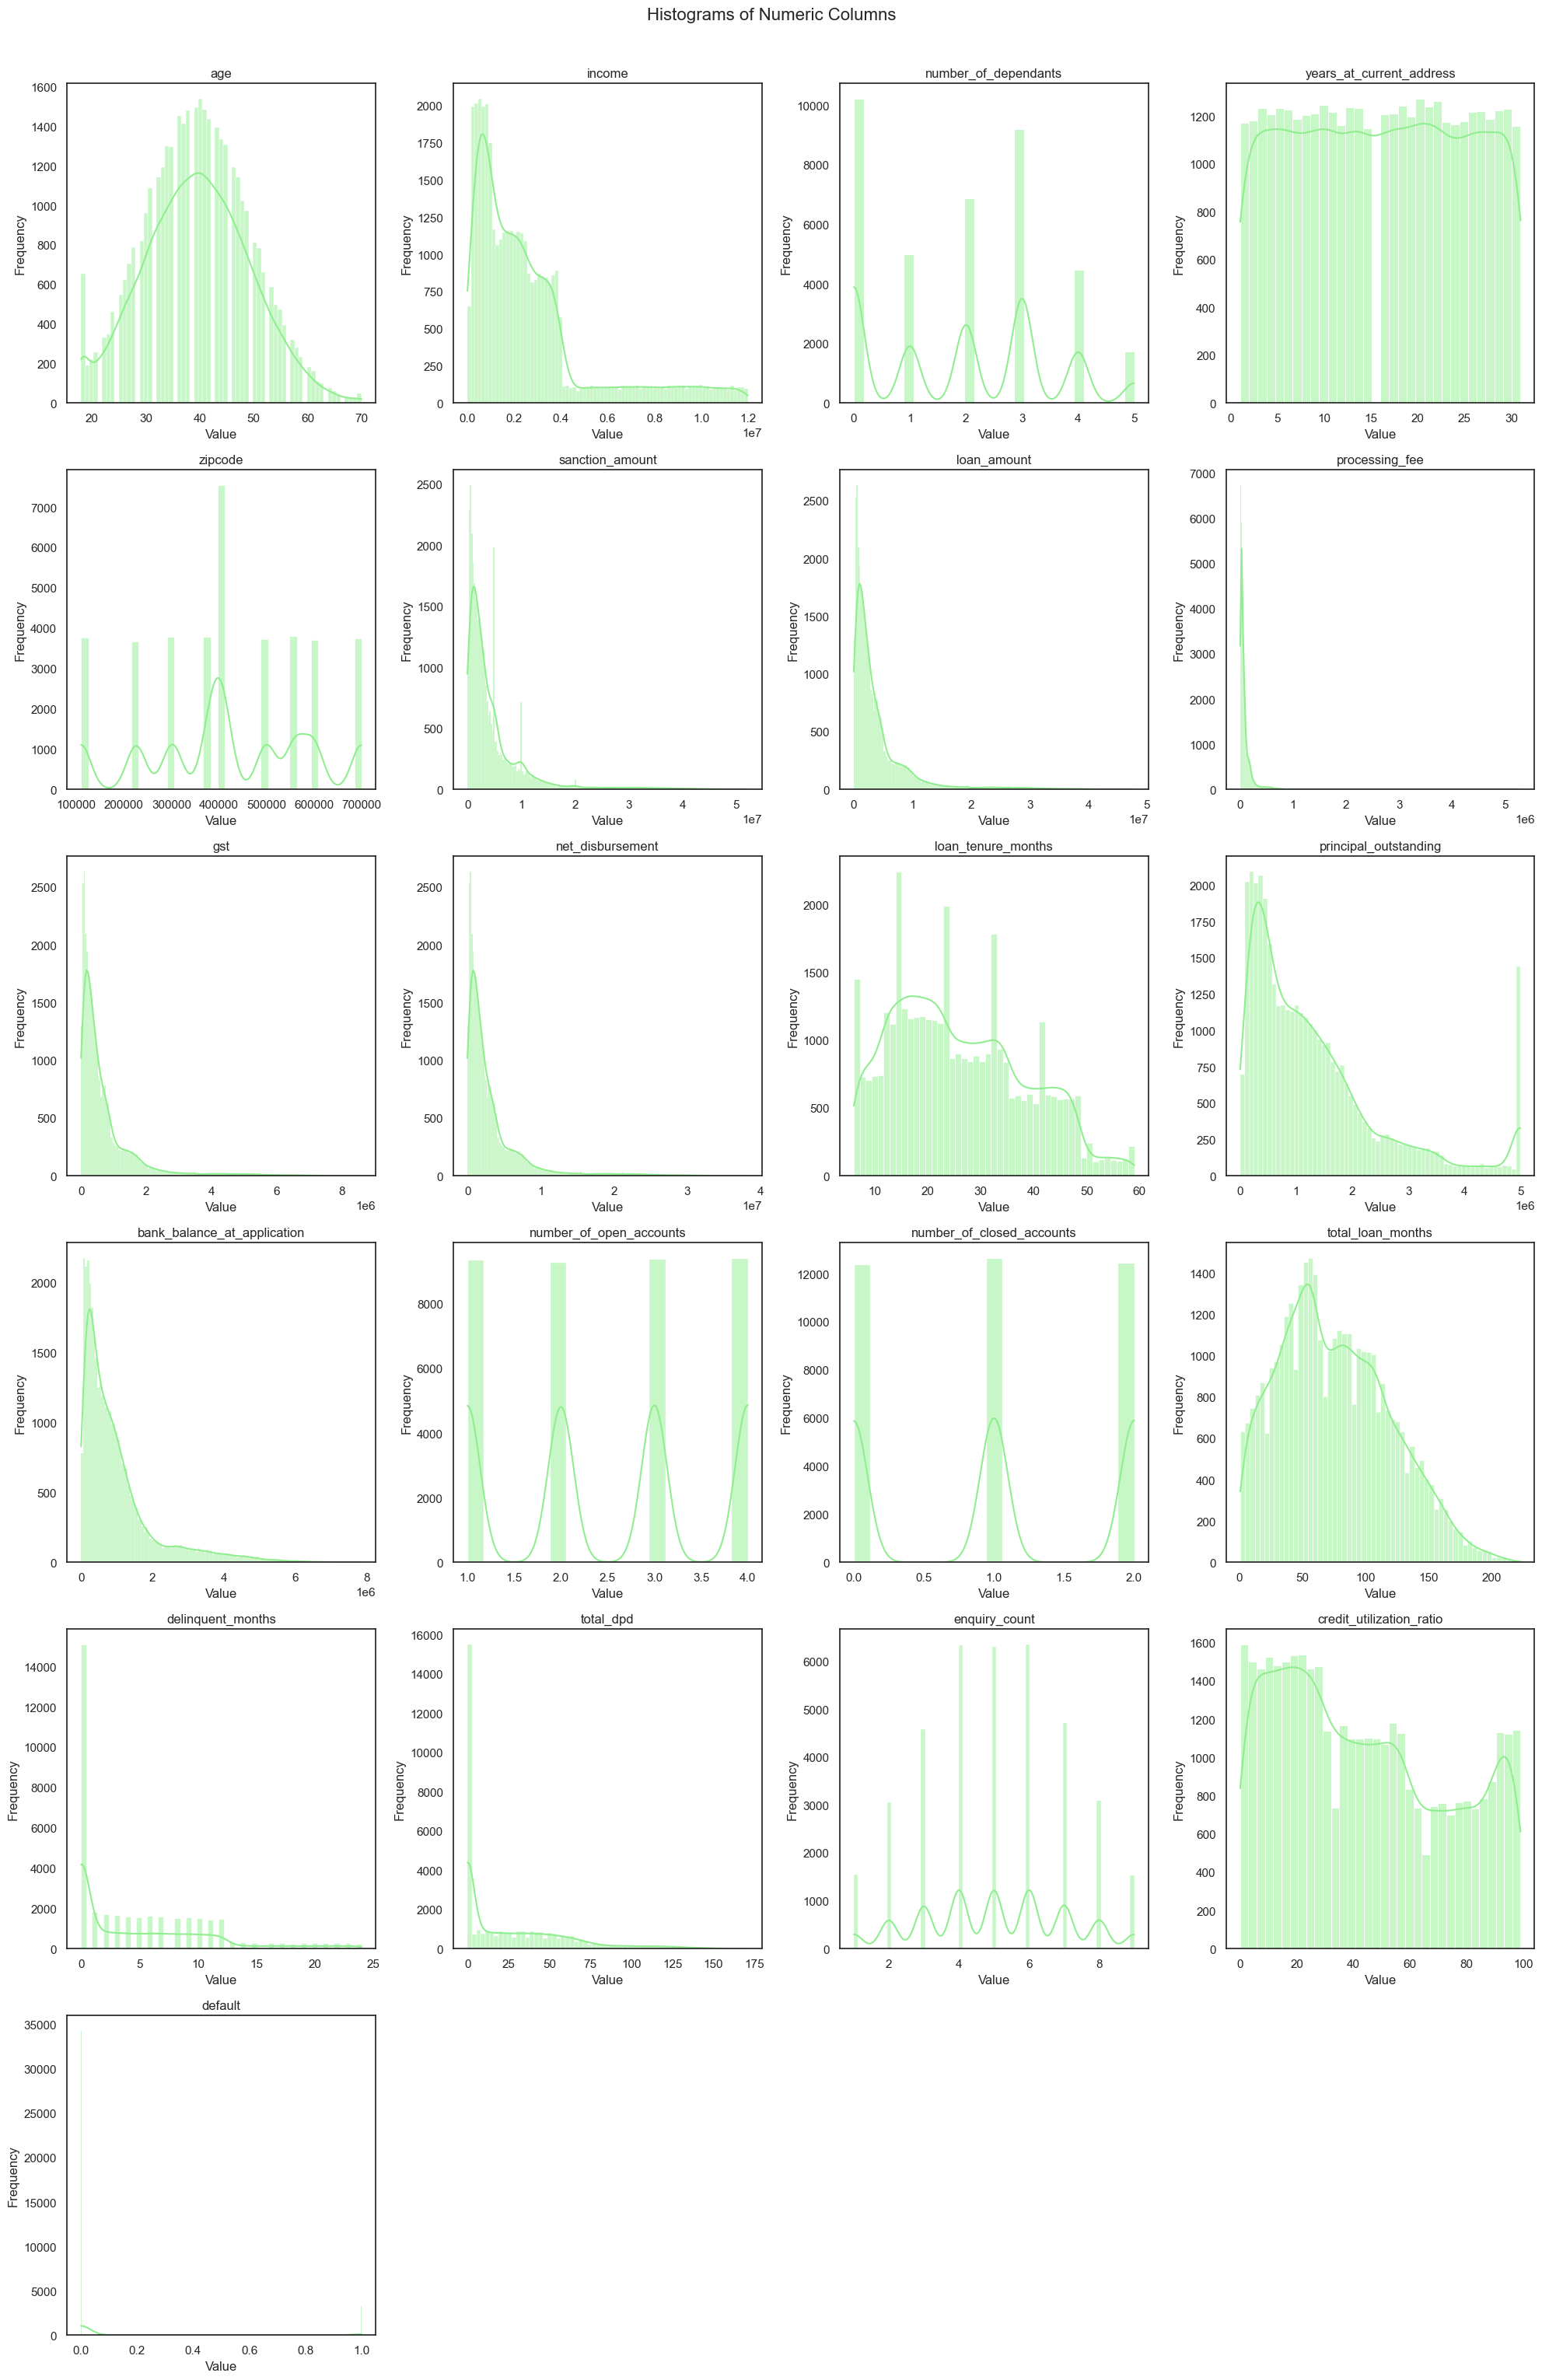

In [521]:


num_plots = len(numeric_cols)
num_cols = 4  # Number of plots per row
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate the number of rows needed

fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 5 * num_rows))  # Adjust figure size
axes = axes.flatten()  # Flatten the axes array for easier indexing

for i, col in enumerate(numeric_cols):
    sns.histplot(df_train[col], ax=axes[i], kde=True, color='lightgreen')
    axes[i].set_title(col)  # Set the title to the name of the variable
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

# If there are any empty plots (if the number of plots isn't a perfect multiple of num_cols)
for j in range(i + 1, num_rows * num_cols):
    axes[j].axis('off')

plt.tight_layout()
plt.suptitle('Histograms of Numeric Columns', fontsize=16, y=1.02)
plt.show()


In [522]:
df_train.processing_fee.describe()

count     37500.00
mean      80290.68
std      113128.14
min           0.00
25%       19220.00
50%       44600.00
75%       92420.00
max     5293543.52
Name: processing_fee, dtype: float64

In [523]:
df_train[df_train.processing_fee>df_train.loan_amount][["loan_amount","processing_fee"]]

,loan_amount,processing_fee
23981,2234000,2669791.02
28174,966000,1214492.67
47089,1738000,1858964.77
29305,2616000,3036378.01
9898,3626000,5293543.52


In [524]:
df_train[(df_train.processing_fee/df_train.loan_amount)>0.03][["loan_amount","processing_fee"]]

,loan_amount,processing_fee
23981,2234000,2669791.02
28174,966000,1214492.67
47089,1738000,1858964.77
29305,2616000,3036378.01
9898,3626000,5293543.52


In [525]:
df_train_1=df_train[(df_train.processing_fee/df_train.loan_amount)<0.03].copy()

In [526]:
df_train_1[(df_train_1.processing_fee/df_train_1.loan_amount)>0.03][["loan_amount","processing_fee"]]

,loan_amount,processing_fee


In [527]:
df_test=df_test[(df_test.processing_fee/df_test.loan_amount)<0.03].copy()

In [528]:
#categorical_cols=categorical_cols[0:].copy()

In [529]:
for i in categorical_cols:
    print(i," ------ ",df_train_1[i].unique())

cust_id  ------  ['C12747' 'C32496' 'C43676' ... 'C45237' 'C49229' 'C37785']
gender  ------  ['M' 'F']
marital_status  ------  ['Married' 'Single']
employment_status  ------  ['Self-Employed' 'Salaried']
residence_type  ------  ['Owned' 'Mortgage' 'Rented']
city  ------  ['Hyderabad' 'Mumbai' 'Chennai' 'Bangalore' 'Pune' 'Kolkata' 'Ahmedabad'
 'Delhi' 'Lucknow' 'Jaipur']
state  ------  ['Telangana' 'Maharashtra' 'Tamil Nadu' 'Karnataka' 'West Bengal'
 'Gujarat' 'Delhi' 'Uttar Pradesh' 'Rajasthan']
loan_id  ------  ['L12747' 'L32496' 'L43676' ... 'L45237' 'L49229' 'L37785']
loan_purpose  ------  ['Home' 'Education' 'Personal' 'Auto' 'Personaal']
loan_type  ------  ['Secured' 'Unsecured']
disbursal_date  ------  ['2020-10-31' '2022-10-22' '2023-12-04' ... '2022-02-07' '2019-10-30'
 '2022-10-04']
installment_start_dt  ------  ['2020-11-11' '2022-10-27' '2023-12-29' ... '2024-08-19' '2019-07-28'
 '2019-07-25']


In [530]:
df_train_1["loan_purpose"]=df_train_1["loan_purpose"].replace("Personaal","Personal")
df_test["loan_purpose"]=df_test["loan_purpose"].replace("Personaal","Personal")


In [531]:
df_train_1["loan_purpose"].unique()

array(['Home', 'Education', 'Personal', 'Auto'], dtype=object)

-----
<h3 align="center", style="color:blue">Exploratory Data Analysis</h3>

-----

In [532]:
numeric_cols

['age',
 'income',
 'number_of_dependants',
 'years_at_current_address',
 'zipcode',
 'sanction_amount',
 'loan_amount',
 'processing_fee',
 'gst',
 'net_disbursement',
 'loan_tenure_months',
 'principal_outstanding',
 'bank_balance_at_application',
 'number_of_open_accounts',
 'number_of_closed_accounts',
 'total_loan_months',
 'delinquent_months',
 'total_dpd',
 'enquiry_count',
 'credit_utilization_ratio',
 'default']

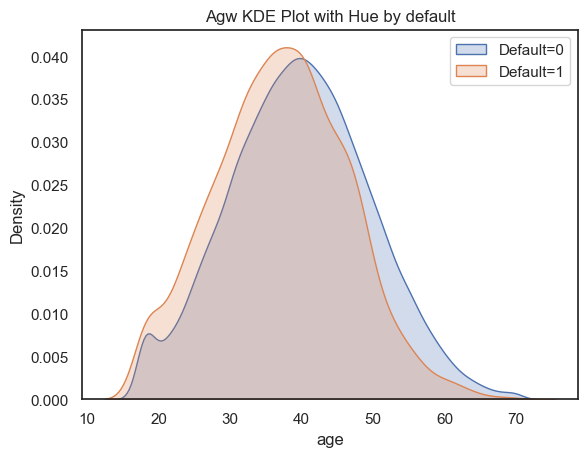

In [533]:
sns.kdeplot(df_train_1[df_train_1.default==0].age,fill=True, label="Default=0")
sns.kdeplot(df_train_1[df_train_1.default==1].age,fill=True, label="Default=1")
plt.title("Agw KDE Plot with Hue by default")
plt.legend()
plt.show()

Insights
1. Orange graph is little bit shifted to the left of blue graph which indicates that people with young age are more likely to default

C:\Users\Trijesh Kondapuram\AppData\Local\Temp\ipykernel_13236\1921173901.py:9: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df_train_1[df_train_1['default'] == 0][col], fill=True, label='Default=0', ax=axes[i])
C:\Users\Trijesh Kondapuram\AppData\Local\Temp\ipykernel_13236\1921173901.py:10: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df_train_1[df_train_1['default'] == 1][col], fill=True, label='Default=1', ax=axes[i])
C:\Users\Trijesh Kondapuram\AppData\Local\Temp\ipykernel_13236\1921173901.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[i].legend()


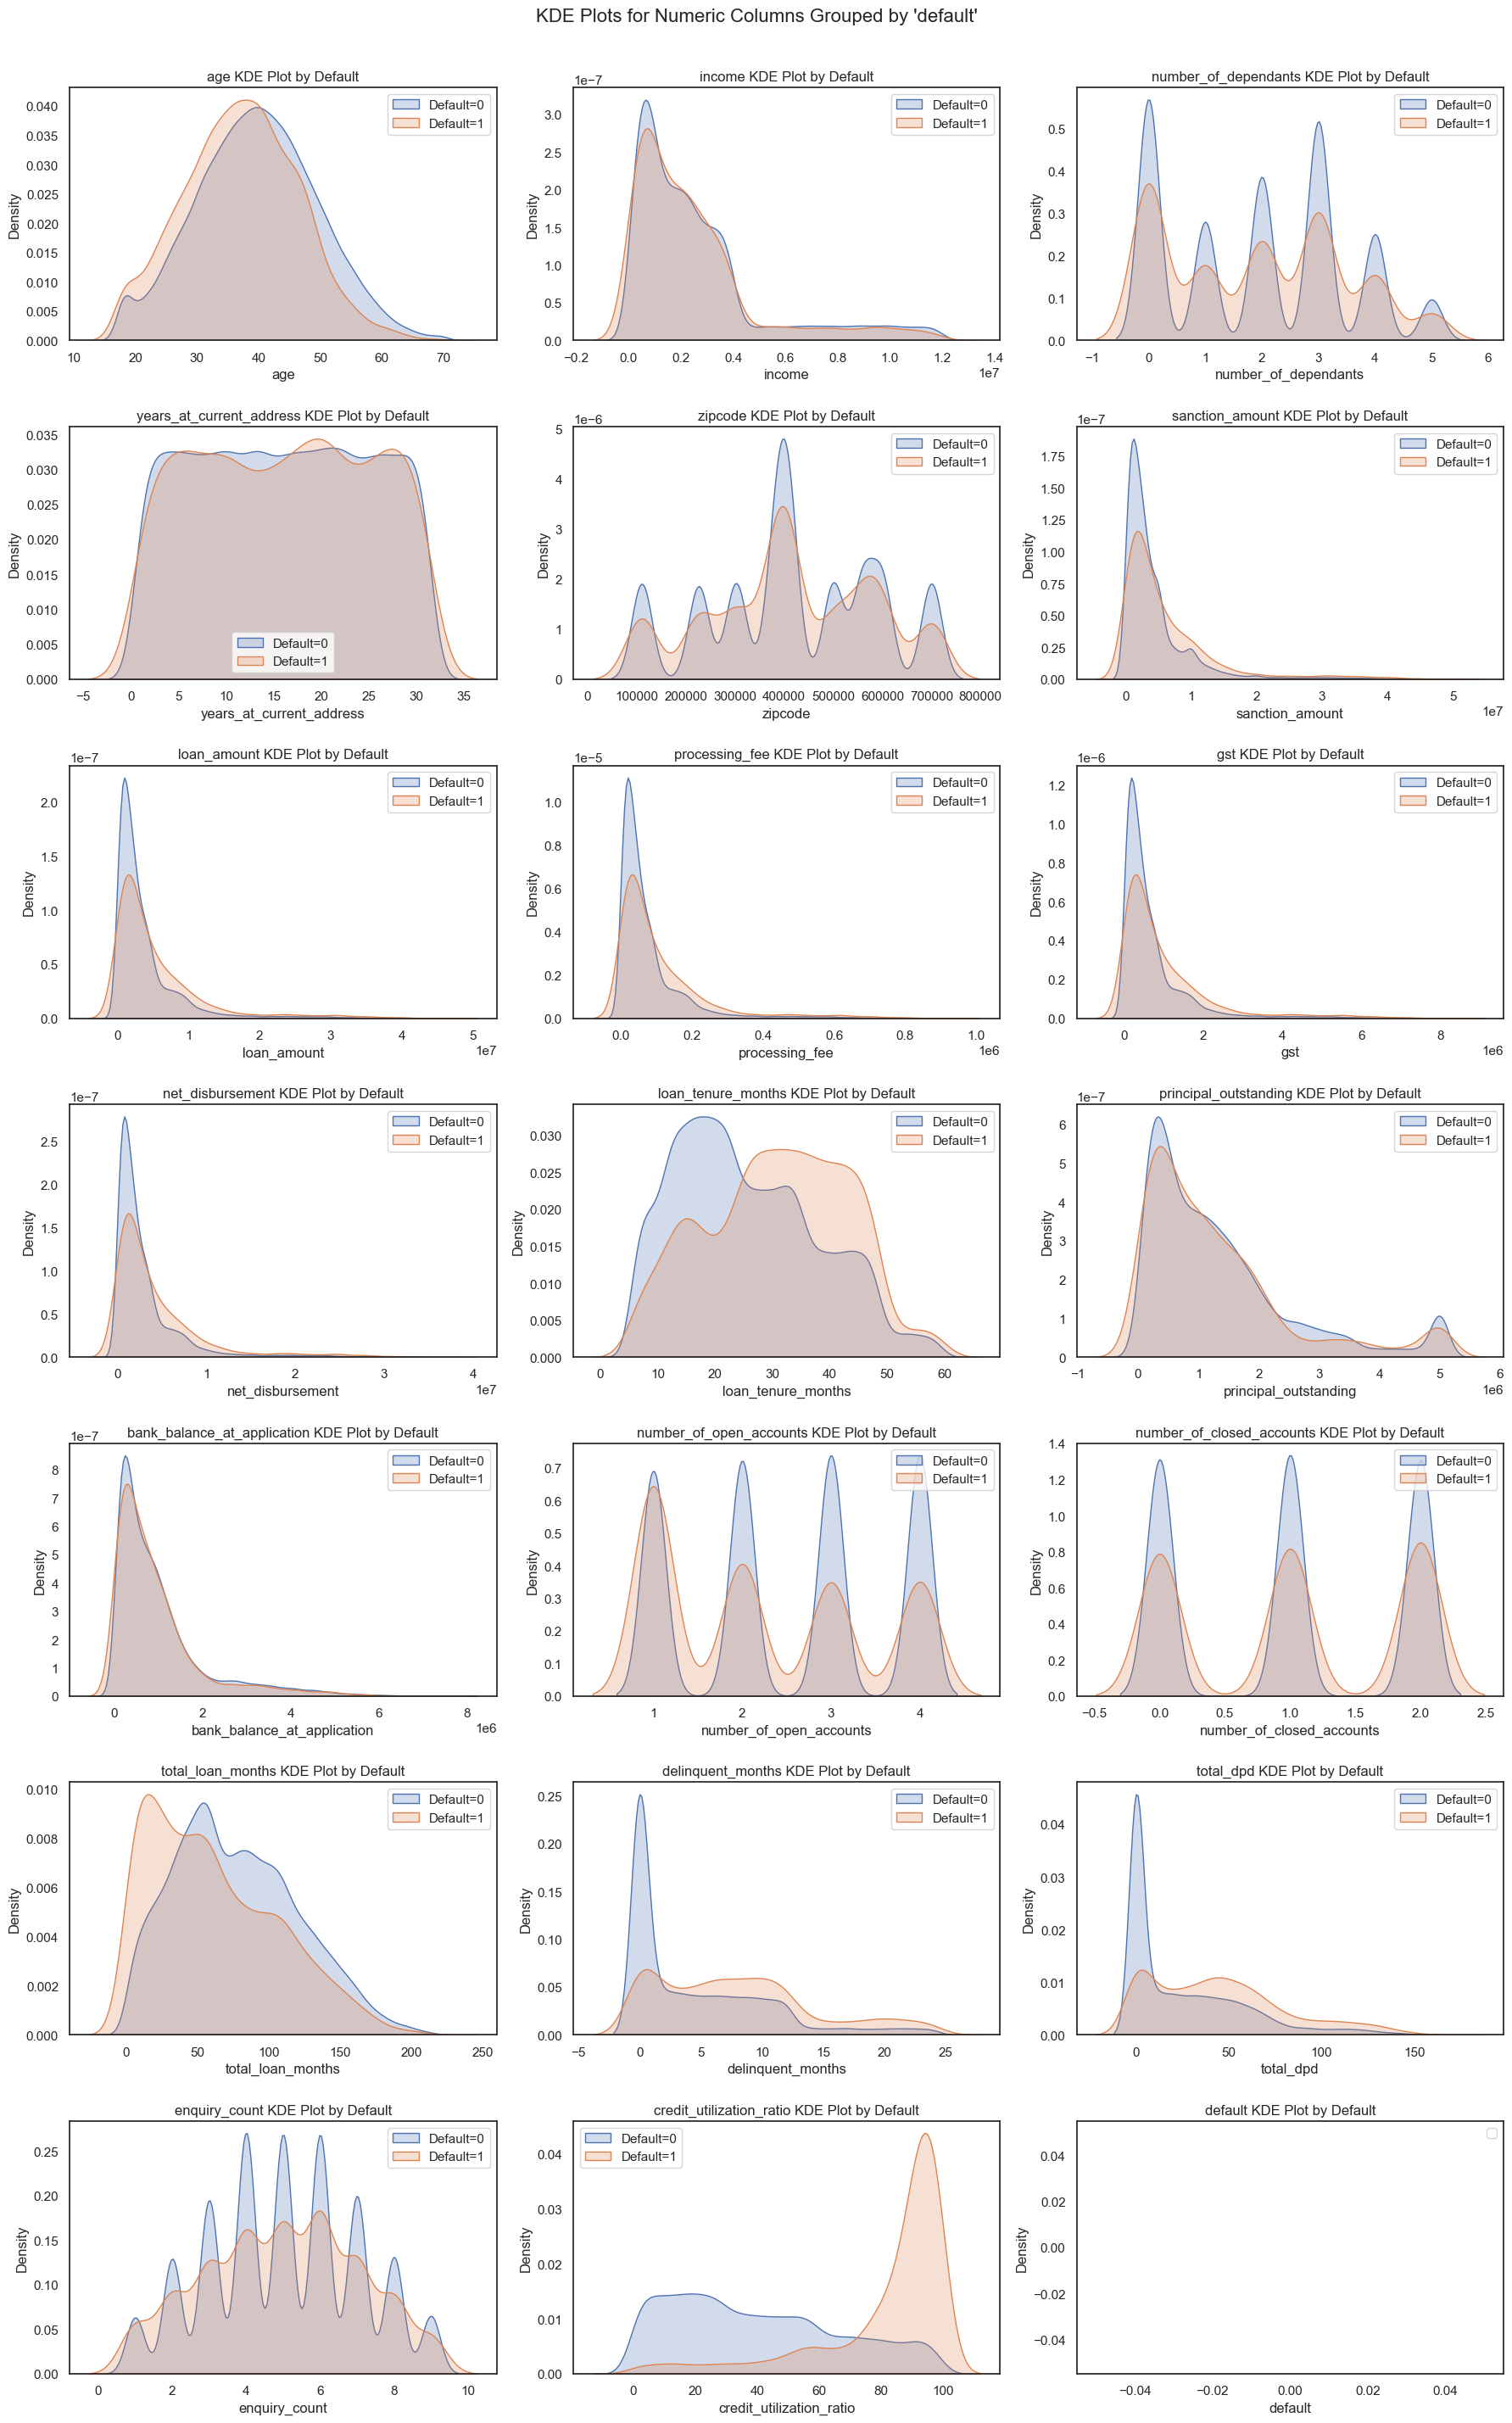

In [534]:
num_plots = len(numeric_cols)
num_cols = 3  # Number of plots per row
num_rows = (num_plots + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(6 * num_cols, 4 * num_rows))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.kdeplot(df_train_1[df_train_1['default'] == 0][col], fill=True, label='Default=0', ax=axes[i])
    sns.kdeplot(df_train_1[df_train_1['default'] == 1][col], fill=True, label='Default=1', ax=axes[i])
    axes[i].set_title(f"{col} KDE Plot by Default")
    axes[i].legend()

# Turn off any unused subplots
for j in range(i + 1, num_rows * num_cols):
    axes[j].axis('off')

plt.tight_layout()
plt.suptitle("KDE Plots for Numeric Columns Grouped by 'default'", fontsize=16, y=1.02)
plt.show()

Insights
1. In columns: loan_tenure_months, delinquent_months, total_dpd, credit_utilization, higher values indicate high likelyhood of becoming a default. Hence
these 4 looks like strong predictors
2. In remaining columns the distributions do not give any obvious insights
3. Why loan_amount and income did not give any signs of being strong predictors? May be when we combine these two and get loan to income ratio (LTI),
that may have influence on the target variable. We will explore more later

-----
<h3 align="center", style="color:blue">Feature Engineering</h3>

-----

In [535]:
df_train_1["loan_to_income"]=df_train_1["loan_amount"]/df_train_1["income"]



df_train_1["loan_to_income"]

12746   2.07
32495   1.61
43675   3.54
9040    1.13
13077   0.50
        ... 
28515   0.57
5558    1.11
45236   3.37
49228   1.48
37784   0.84
Name: loan_to_income, Length: 37488, dtype: float64

In [536]:
df_test["loan_to_income"]=df_test["loan_amount"]/df_test["income"]

In [537]:
df_test.head(0)

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,installment_start_dt,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default,loan_to_income


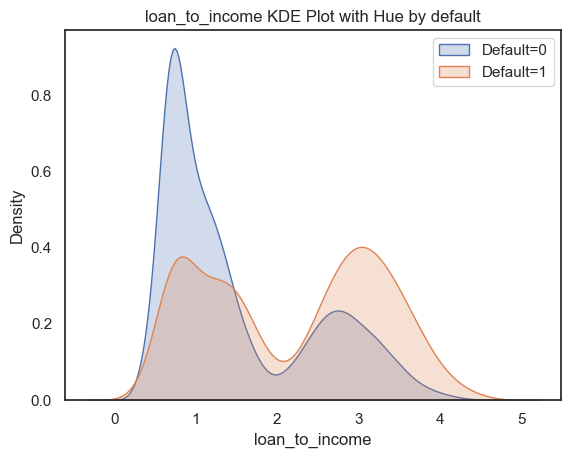

In [538]:
sns.kdeplot(df_train_1[df_train_1.default==0].loan_to_income,fill=True, label="Default=0")
sns.kdeplot(df_train_1[df_train_1.default==1].loan_to_income,fill=True, label="Default=1")
plt.title("loan_to_income KDE Plot with Hue by default")
plt.legend()
plt.show()

In [539]:
df_train_1.columns

Index(['cust_id', 'age', 'gender', 'marital_status', 'employment_status',
       'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode', 'loan_id',
       'loan_purpose', 'loan_type', 'sanction_amount', 'loan_amount',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application',
       'disbursal_date', 'installment_start_dt', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio', 'default',
       'loan_to_income'],
      dtype='object')

In [540]:
df_train_1["delinquency_ratio"]=(df_train_1["delinquent_months"]*100 /df_train_1["total_loan_months"]).round(1)
df_test["delinquency_ratio"]=(df_test["delinquent_months"]*100 /df_test["total_loan_months"]).round(1)


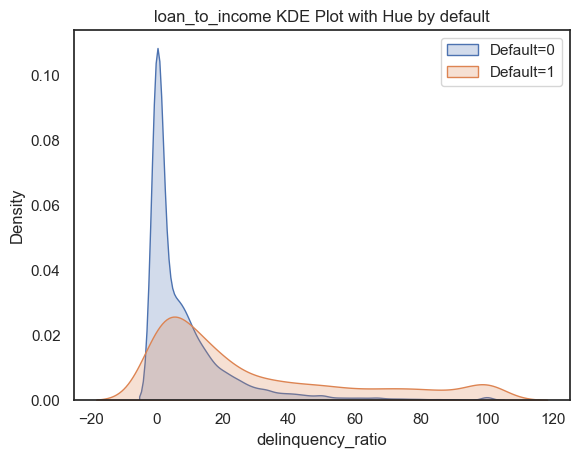

In [541]:
sns.kdeplot(df_train_1[df_train_1.default==0].delinquency_ratio,fill=True, label="Default=0")
sns.kdeplot(df_train_1[df_train_1.default==1].delinquency_ratio,fill=True, label="Default=1")
plt.title("loan_to_income KDE Plot with Hue by default")
plt.legend()
plt.show()

In [542]:
df_train_1['avg_dpd_per_delinquency'] = (df_train_1['total_dpd'] / df_train_1['delinquent_months']).round(1)
df_test['avg_dpd_per_delinquency'] = (df_test['total_dpd'] / df_test['delinquent_months']).round(1)

df_train_1['avg_dpd_per_delinquency'].isna().sum()

np.int64(15088)

In [543]:
df_train_1['avg_dpd_per_delinquency'] = np.where(
df_train_1['delinquent_months'] != 0,
(df_train_1['total_dpd'] / df_train_1['delinquent_months']).round(1),
0
)
df_test['avg_dpd_per_delinquency'] = np.where(
df_test['delinquent_months'] != 0,
(df_test['total_dpd'] / df_test['delinquent_months']).round(1),
0
)

df_train_1['avg_dpd_per_delinquency'].describe()

count   37488.00
mean        3.28
std         2.91
min         0.00
25%         0.00
50%         4.30
75%         5.72
max        10.00
Name: avg_dpd_per_delinquency, dtype: float64

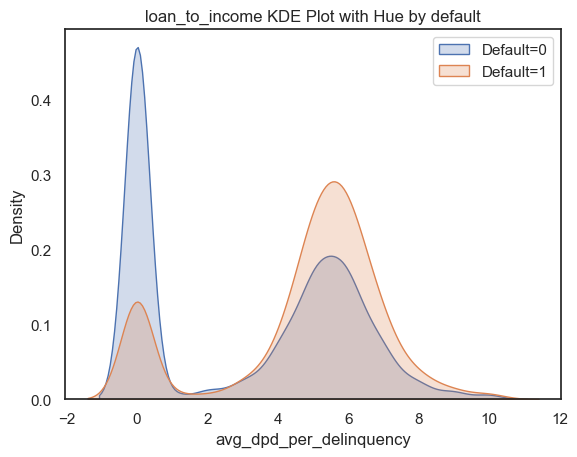

In [544]:
sns.kdeplot(df_train_1[df_train_1.default==0].avg_dpd_per_delinquency,fill=True, label="Default=0")
sns.kdeplot(df_train_1[df_train_1.default==1].avg_dpd_per_delinquency,fill=True, label="Default=1")
plt.title("loan_to_income KDE Plot with Hue by default")
plt.legend()
plt.show()

## Feature Selection 

In [545]:
df_train_1.columns

Index(['cust_id', 'age', 'gender', 'marital_status', 'employment_status',
       'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode', 'loan_id',
       'loan_purpose', 'loan_type', 'sanction_amount', 'loan_amount',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application',
       'disbursal_date', 'installment_start_dt', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio', 'default',
       'loan_to_income', 'delinquency_ratio', 'avg_dpd_per_delinquency'],
      dtype='object')

In [546]:
df_train_2=df_train_1.drop(columns=["cust_id","loan_id"],axis='columns')
df_test=df_test.drop(["cust_id","loan_id"],axis='columns')

In [547]:
df_train_3=df_train_2.drop(["disbursal_date","installment_start_dt","loan_amount","income","total_loan_months","delinquent_months","total_dpd"],axis='columns')
df_test=df_test.drop(["disbursal_date","installment_start_dt","loan_amount","income","total_loan_months","delinquent_months","total_dpd"],axis='columns')
df_train_3.columns

Index(['age', 'gender', 'marital_status', 'employment_status',
       'number_of_dependants', 'residence_type', 'years_at_current_address',
       'city', 'state', 'zipcode', 'loan_purpose', 'loan_type',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'default', 'loan_to_income',
       'delinquency_ratio', 'avg_dpd_per_delinquency'],
      dtype='object')

In [548]:
df_train_3.default.info()

<class 'pandas.core.series.Series'>
Index: 37488 entries, 12746 to 37784
Series name: default
Non-Null Count  Dtype
--------------  -----
37488 non-null  int64
dtypes: int64(1)
memory usage: 585.8 KB


In [549]:
df_train_3.select_dtypes(["int64","Float64"]).drop(["zipcode","default"],axis='columns').columns


Index(['age', 'number_of_dependants', 'years_at_current_address',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income', 'delinquency_ratio',
       'avg_dpd_per_delinquency'],
      dtype='object')

In [550]:
x_train=df_train_3.drop("default",axis='columns')
y_train=df_train_3["default"]

from sklearn.preprocessing import MinMaxScaler
col_to_scale=df_train_3.select_dtypes(["int64","Float64"]).drop(["zipcode","default"],axis='columns').columns

Scalar=MinMaxScaler()
x_train[col_to_scale]=Scalar.fit_transform(x_train[col_to_scale])

x_train.describe()


,age,number_of_dependants,years_at_current_address,zipcode,sanction_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency
count,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00
mean,0.41,0.39,0.50,418876.24,0.09,0.08,0.08,0.08,0.38,0.26,0.12,0.50,0.50,0.50,0.44,0.29,0.10,0.33
std,0.19,0.31,0.30,169029.87,0.12,0.11,0.11,0.11,0.23,0.24,0.13,0.37,0.41,0.25,0.30,0.23,0.17,0.29
min,0.00,0.00,0.00,110001.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.29,0.00,0.23,302001.00,0.02,0.02,0.02,0.02,0.19,0.08,0.03,0.00,0.00,0.38,0.18,0.11,0.00,0.00
50%,0.40,0.40,0.50,400001.00,0.05,0.05,0.05,0.05,0.34,0.19,0.08,0.67,0.50,0.50,0.39,0.20,0.04,0.43
75%,0.54,0.60,0.77,560001.00,0.10,0.10,0.10,0.10,0.55,0.35,0.16,1.00,1.00,0.62,0.68,0.51,0.13,0.57
max,1.00,1.00,1.00,700001.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [551]:
X_test = df_test.drop('default', axis='columns')
y_test = df_test['default']
X_test[col_to_scale] = Scalar.transform(X_test[col_to_scale])
X_test.describe()

,age,number_of_dependants,years_at_current_address,zipcode,sanction_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency
count,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00
mean,0.42,0.38,0.50,419759.82,0.09,0.08,0.08,0.08,0.38,0.26,0.12,0.50,0.50,0.50,0.44,0.29,0.11,0.33
std,0.19,0.31,0.30,168845.35,0.12,0.11,0.11,0.11,0.23,0.25,0.13,0.37,0.41,0.25,0.30,0.23,0.17,0.29
min,0.00,0.00,0.00,110001.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00
25%,0.29,0.00,0.23,302001.00,0.02,0.02,0.02,0.02,0.19,0.08,0.03,0.00,0.00,0.38,0.18,0.11,0.00,0.00
50%,0.42,0.40,0.50,411001.00,0.05,0.05,0.05,0.05,0.34,0.20,0.08,0.33,0.50,0.50,0.39,0.20,0.04,0.44
75%,0.54,0.60,0.77,560001.00,0.10,0.09,0.09,0.09,0.55,0.36,0.16,0.67,1.00,0.62,0.68,0.50,0.13,0.58
max,1.00,1.00,1.00,700001.00,0.98,0.96,0.96,0.96,1.00,1.00,0.94,1.00,1.00,1.00,1.00,1.01,1.00,1.00


In [552]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculate_vif(data):
    vif_df =pd.DataFrame()
    vif_df['Column'] = data.columns
    vif_df['VIF'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    return vif_df

In [553]:
calculate_vif(x_train[col_to_scale])

c:\Users\Trijesh Kondapuram\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Column,VIF
0,age,5.55
1,number_of_dependants,2.72
2,years_at_current_address,3.36
3,sanction_amount,101.08
4,processing_fee,inf
5,gst,inf
6,net_disbursement,inf
7,loan_tenure_months,6.17
8,principal_outstanding,16.32
9,bank_balance_at_application,9.33


In [554]:
features_to_drop_vif=['sanction_amount','processing_fee','gst','net_disbursement','principal_outstanding']

x_train_1=x_train.drop(features_to_drop_vif,axis='columns')

In [555]:
x_train_1.select_dtypes(['int64','float64']).columns

Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'loan_tenure_months', 'bank_balance_at_application',
       'number_of_open_accounts', 'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income', 'delinquency_ratio',
       'avg_dpd_per_delinquency'],
      dtype='object')

In [556]:
vif_df=calculate_vif(x_train_1[['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'loan_tenure_months', 'bank_balance_at_application',
       'number_of_open_accounts', 'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income', 'delinquency_ratio',
       'avg_dpd_per_delinquency']])
vif_df

,Column,VIF
0,age,5.53
1,number_of_dependants,2.73
2,years_at_current_address,3.45
3,zipcode,5.61
4,loan_tenure_months,6.03
5,bank_balance_at_application,1.81
6,number_of_open_accounts,4.36
7,number_of_closed_accounts,2.39
8,enquiry_count,6.44
9,credit_utilization_ratio,2.95


In [557]:
selected_numeric_cols_vif=vif_df.Column.values
selected_numeric_cols_vif

array(['age', 'number_of_dependants', 'years_at_current_address',
       'zipcode', 'loan_tenure_months', 'bank_balance_at_application',
       'number_of_open_accounts', 'number_of_closed_accounts',
       'enquiry_count', 'credit_utilization_ratio', 'loan_to_income',
       'delinquency_ratio', 'avg_dpd_per_delinquency'], dtype=object)

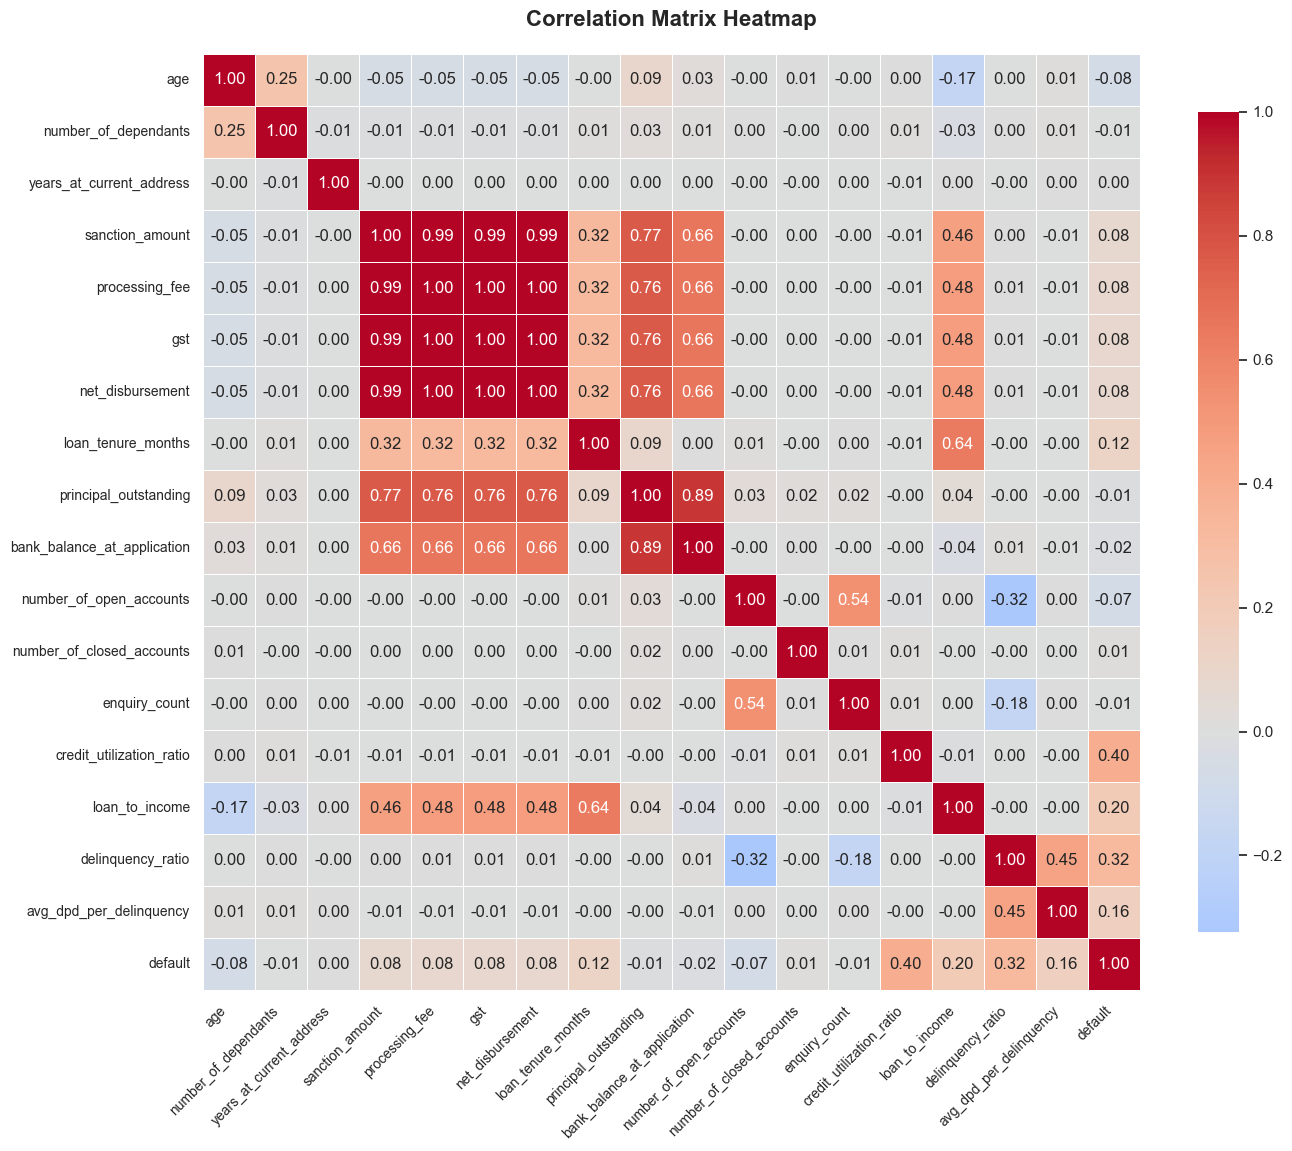

In [558]:
numeric_cols = df_train_3.select_dtypes(["int64", "float64", "Float64"]).columns
cols_to_plot = numeric_cols.drop(['zipcode', 'default'], errors='ignore').tolist() + ['default']

# Compute correlation matrix
cm = df_train_3[cols_to_plot].corr()

# Set up the plot
plt.figure(figsize=(14, 12))
sns.set(style='white')

# Draw heatmap
sns.heatmap(cm, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})

# Style tweaks
plt.title('Correlation Matrix Heatmap', fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()

In [559]:
categorical_cols

['cust_id',
 'gender',
 'marital_status',
 'employment_status',
 'residence_type',
 'city',
 'state',
 'loan_id',
 'loan_purpose',
 'loan_type',
 'disbursal_date',
 'installment_start_dt']

In [560]:
def calculate_woe_iv(df, feature, target):
    grouped = df.groupby(feature)[target].agg(['count','sum'])
    grouped = grouped.rename(columns={'count': 'total', 'sum': 'good'})
    grouped['bad']=grouped['total']-grouped['good']
    
    total_good = grouped['good'].sum()
    total_bad = grouped['bad'].sum()
    
    grouped['good_pct'] = grouped['good'] / total_good
    grouped['bad_pct'] = grouped['bad'] / total_bad
    grouped['woe'] = np.log(grouped['good_pct']/ grouped['bad_pct'])
    grouped['iv'] = (grouped['good_pct'] -grouped['bad_pct'])*grouped['woe']
    
    grouped['woe'] = grouped['woe'].replace([np.inf, -np.inf], 0)
    grouped['iv'] = grouped['iv'].replace([np.inf, -np.inf], 0)
    
    total_iv = grouped['iv'].sum()
    
    return grouped, total_iv

grouped, total_iv = calculate_woe_iv(pd.concat([x_train_1, y_train],axis=1), 'loan_purpose', 'default')
grouped

,total,good,bad,good_pct,bad_pct,woe,iv
loan_purpose,,,,,,,
Auto,7447,327,7120,0.10,0.21,-0.72,0.08
Education,5620,559,5061,0.17,0.15,0.16,0.00
Home,11304,1734,9570,0.54,0.28,0.66,0.17
Personal,13117,603,12514,0.19,0.37,-0.67,0.12


In [561]:
iv_values = {}

for feature in x_train_1.columns:
    if x_train_1[feature].dtype == 'object':
        _, iv = calculate_woe_iv(pd.concat([x_train_1, y_train],axis=1), feature, 'default' )
    else:
        X_binned = pd.cut(x_train_1[feature], bins=10, labels=False)
        _, iv = calculate_woe_iv(pd.concat([X_binned, y_train],axis=1), feature, 'default' )
    iv_values[feature] = iv
        
iv_values                                                                                                                             

{'age': np.float64(0.0890689462679479),
 'gender': np.float64(0.00047449502170914947),
 'marital_status': np.float64(0.001129766845390142),
 'employment_status': np.float64(0.003953046301722585),
 'number_of_dependants': np.float64(0.0019380899135053508),
 'residence_type': np.float64(0.246745268718145),
 'years_at_current_address': np.float64(0.0020800513608156363),
 'city': np.float64(0.0019059578709781529),
 'state': np.float64(0.0019005589806779287),
 'zipcode': np.float64(0.0016677413243392572),
 'loan_purpose': np.float64(0.3691197842282755),
 'loan_type': np.float64(0.16319324904149224),
 'loan_tenure_months': np.float64(0.21893515090196278),
 'bank_balance_at_application': np.float64(0.0063187993277516365),
 'number_of_open_accounts': np.float64(0.08463134083005877),
 'number_of_closed_accounts': np.float64(0.0011964272592421567),
 'enquiry_count': np.float64(0.007864214085342608),
 'credit_utilization_ratio': np.float64(2.352965568168245),
 'loan_to_income': np.float64(0.47572

In [562]:
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))

iv_df = pd.DataFrame(list(iv_values.items()), columns=['Feature', 'IV'])
iv_df = iv_df.sort_values(by='IV', ascending=False)
iv_df

,Feature,IV
17,credit_utilization_ratio,2.353
19,delinquency_ratio,0.717
18,loan_to_income,0.476
20,avg_dpd_per_delinquency,0.402
10,loan_purpose,0.369
5,residence_type,0.247
12,loan_tenure_months,0.219
11,loan_type,0.163
0,age,0.089
14,number_of_open_accounts,0.085


In [563]:
# select features that has IV > 0.02
selected_features_iv = [feature for feature, iv in iv_values.items() if iv > 0.02]
selected_features_iv

['age',
 'residence_type',
 'loan_purpose',
 'loan_type',
 'loan_tenure_months',
 'number_of_open_accounts',
 'credit_utilization_ratio',
 'loan_to_income',
 'delinquency_ratio',
 'avg_dpd_per_delinquency']

### Feature Encoding

In [564]:
X_train_reduced = x_train_1[selected_features_iv]
X_test_reduced = X_test[selected_features_iv]

In [565]:
X_train_encoded = pd.get_dummies(X_train_reduced, drop_first=True)
X_train_encoded.head(3)

,age,loan_tenure_months,number_of_open_accounts,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency,residence_type_Owned,residence_type_Rented,loan_purpose_Education,loan_purpose_Home,loan_purpose_Personal,loan_type_Unsecured
12746,0.788,0.415,1.000,0.364,0.415,0.132,0.590,True,False,False,True,False,False
32495,0.500,0.830,0.667,0.051,0.307,0.062,0.620,True,False,True,False,False,False
43675,0.385,0.491,0.000,0.000,0.759,0.222,0.560,False,False,False,True,False,False


In [566]:
X_test_encoded = pd.get_dummies(X_test_reduced, drop_first=True)
X_test_encoded.head(3)

,age,loan_tenure_months,number_of_open_accounts,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency,residence_type_Owned,residence_type_Rented,loan_purpose_Education,loan_purpose_Home,loan_purpose_Personal,loan_type_Unsecured
19205,0.346,0.755,0.333,0.990,0.552,0.000,0.000,True,False,False,True,False,False
15514,0.481,0.226,1.000,0.323,0.220,0.000,0.000,True,False,True,False,False,False
30367,0.231,0.547,0.667,0.828,0.180,0.000,0.000,True,False,False,False,False,False


<h3 align="center" style="color:blue">Model Training</h3>

In [567]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = LogisticRegression()
model.fit(X_train_encoded, y_train)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11423
           1       0.85      0.72      0.78      1074

    accuracy                           0.96     12497
   macro avg       0.91      0.85      0.88     12497
weighted avg       0.96      0.96      0.96     12497



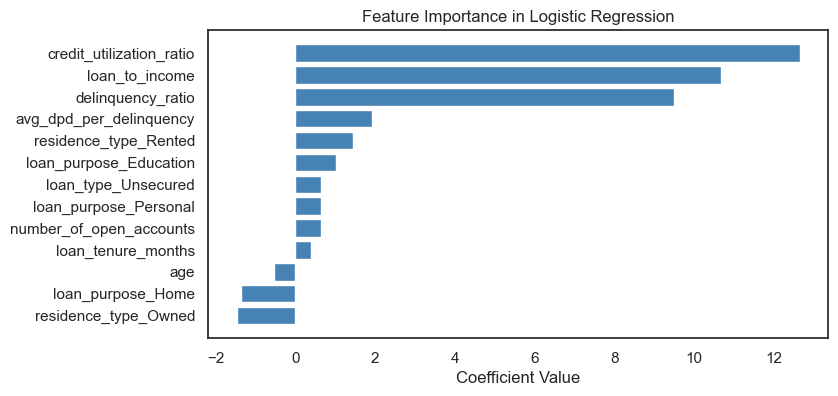

In [568]:
feature_importance = model.coef_[0]

# Create a DataFrame for easier handling
coef_df = pd.DataFrame(feature_importance, index=X_train_encoded.columns, columns=['Coefficients'])

# Sort the coefficients for better visualization
coef_df = coef_df.sort_values(by='Coefficients', ascending=True)

# Plotting
plt.figure(figsize=(8, 4))
plt.barh(coef_df.index, coef_df['Coefficients'], color='steelblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Logistic Regression')
plt.show()

In [569]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train_encoded, y_train)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11423
           1       0.86      0.70      0.77      1074

    accuracy                           0.96     12497
   macro avg       0.91      0.85      0.88     12497
weighted avg       0.96      0.96      0.96     12497



In [570]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train_encoded, y_train)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     11423
           1       0.81      0.76      0.78      1074

    accuracy                           0.96     12497
   macro avg       0.90      0.87      0.88     12497
weighted avg       0.96      0.96      0.96     12497



Since there is not much difference between XGB and Logistic, we will choose LogisticRegression as a candidate for our RandomizedSearchCV candidate it has a better interpretation.

In [571]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'C': np.logspace(-4, 4, 20),  # Logarithmically spaced values from 10^-4 to 10^4
    'solver': ['lbfgs', 'saga', 'liblinear', 'newton-cg']   # Algorithm to use in the optimization problem
}

# Create the Logistic Regression model
log_reg = LogisticRegression(max_iter=10000)  # Increased max_iter for convergence

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=log_reg,
    param_distributions=param_dist,
    n_iter=50,  # Number of parameter settings that are sampled
    scoring='f1',
    cv=3,  # 5-fold cross-validation
    verbose=2,
    random_state=42,  # Set a random state for reproducibility
    n_jobs=-1  # Use all available cores
)

# Fit the RandomizedSearchCV to the training data
random_search.fit(X_train_encoded, y_train)

# Print the best parameters and best score
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Score: {random_search.best_score_}")

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_encoded)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters: {'solver': 'lbfgs', 'C': np.float64(3792.690190732246)}
Best Score: 0.7578021834474523
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     11423
           1       0.83      0.74      0.78      1074

    accuracy                           0.97     12497
   macro avg       0.91      0.86      0.88     12497
weighted avg       0.96      0.97      0.96     12497



#### RandomizedSearch CV for Attempt 1: XGBoost

In [572]:
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV

# Define parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'scale_pos_weight': [1, 2, 3, 5, 7, 10],
    'reg_alpha': [0.01, 0.1, 0.5, 1.0, 5.0, 10.0],  # L1 regularization term
    'reg_lambda': [0.01, 0.1, 0.5, 1.0, 5.0, 10.0]  # L2 regularization term
}

xgb = XGBClassifier()

random_search = RandomizedSearchCV(estimator=xgb, param_distributions=param_dist, n_iter=100,
                                   scoring='f1', cv=3, verbose=1, n_jobs=-1, random_state=42)

random_search.fit(X_train_encoded, y_train)

# Print the best parameters and best score
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Score: {random_search.best_score_}")

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_encoded)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Parameters: {'subsample': 0.8, 'scale_pos_weight': 2, 'reg_lambda': 1.0, 'reg_alpha': 5.0, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.2, 'colsample_bytree': 0.9}
Best Score: 0.7883640945152446
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     11423
           1       0.77      0.83      0.80      1074

    accuracy                           0.96     12497
   macro avg       0.88      0.90      0.89     12497
weighted avg       0.97      0.96      0.96     12497



### Attempt 2

1. Logistic Regression & XGB
1. Handle Class Imbalance Using Under Sampling

In [578]:
!where python
!pip show imbalanced-learn
!pip show scikit-learn


c:\Users\Trijesh Kondapuram\AppData\Local\Programs\Python\Python313\python.exe
C:\Users\Trijesh Kondapuram\AppData\Local\Microsoft\WindowsApps\python.exe
Name: imbalanced-learn
Version: 0.13.0
Summary: Toolbox for imbalanced dataset in machine learning
Home-page: https://imbalanced-learn.org/
Author: 
Author-email: "G. Lemaitre" <g.lemaitre58@gmail.com>, "C. Aridas" <ichkoar@gmail.com>
License: 
Location: C:\Users\Trijesh Kondapuram\AppData\Local\Programs\Python\Python313\Lib\site-packages
Requires: joblib, numpy, scikit-learn, scipy, sklearn-compat, threadpoolctl
Required-by: imblearn
Name: scikit-learn
Version: 1.6.1
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: BSD 3-Clause License

 Copyright (c) 2007-2024 The scikit-learn developers.
 All rights reserved.

 Redistribution and use in source and binary forms, with or without
 modification, are permitted provided that the following conditions

In [575]:
from imblearn.under_sampling import RandomUnderSampler


ImportError: cannot import name 'SPARSE_ARRAY_PRESENT' from 'sklearn.utils.fixes' (c:\Users\Trijesh Kondapuram\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\fixes.py)